<a href="https://colab.research.google.com/github/najmaasr/Bank-Churn-Prediction/blob/main/Sertifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier, plot_importance

## 1. Mengumpulkan Data

### Load data dari drive

In [ ]:
source = 'https://raw.githubusercontent.com/arubhasy/dataset/main/Bank_Churn_Modelling.csv'
dataset = pd.read_csv(source)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Mengecek nilai duplikat
duplikat = dataset[dataset.duplicated()]
duplikat.sum()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

## 2. Menelaah Data

### Menampilkan struktur dan format data

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### Menampilkan ukuran data

In [ ]:
dataset.shape

(10000, 14)

### Menampilkan informasi data (nama kolom, jumlah data non-null, dan tipe data)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           9997 non-null   object 
 6   Age              9997 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Menampilkan statistik data

In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,39.078223,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,13.453129,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,650.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             3
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
for column in dataset :
  unique = dataset[column].nunique()
  print(f"Total data unik pada kolom", column," : ",unique)

Total data unik pada kolom RowNumber  :  10000
Total data unik pada kolom CustomerId  :  10000
Total data unik pada kolom Surname  :  2932
Total data unik pada kolom CreditScore  :  460
Total data unik pada kolom Geography  :  3
Total data unik pada kolom Gender  :  4
Total data unik pada kolom Age  :  74
Total data unik pada kolom Tenure  :  11
Total data unik pada kolom Balance  :  6382
Total data unik pada kolom NumOfProducts  :  4
Total data unik pada kolom HasCrCard  :  2
Total data unik pada kolom IsActiveMember  :  2
Total data unik pada kolom EstimatedSalary  :  9999
Total data unik pada kolom Exited  :  2


### Menampilkan distribusi data

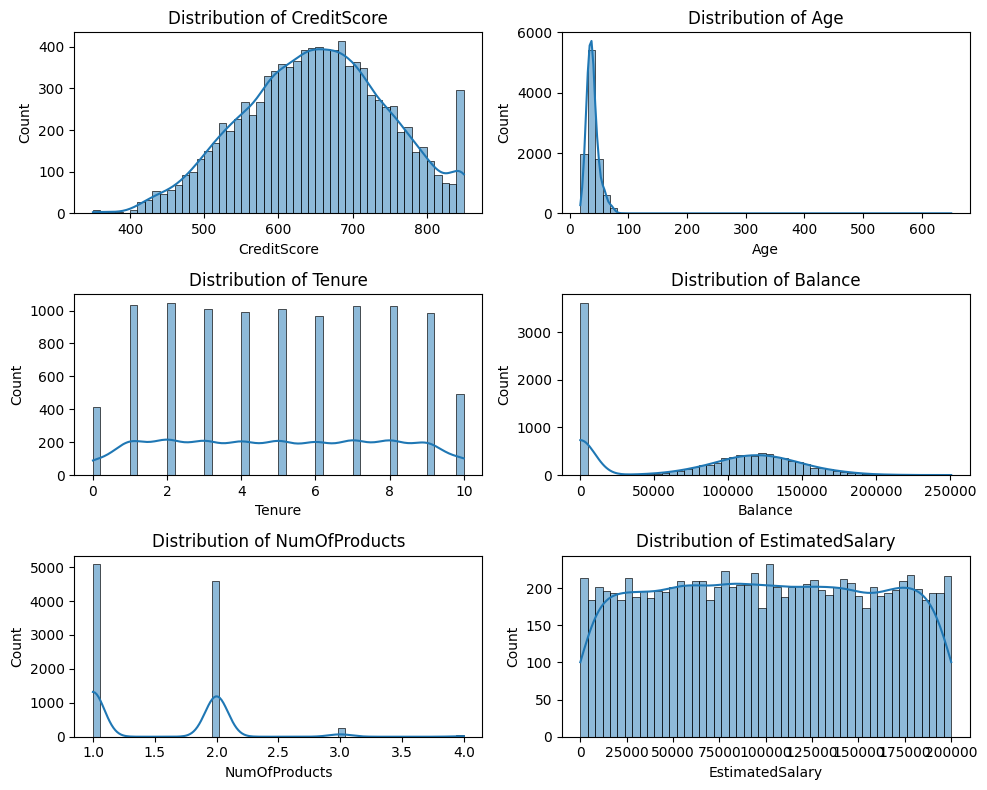

In [ ]:
# Data numerik
num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(10, 8))
for i, col in enumerate(num, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

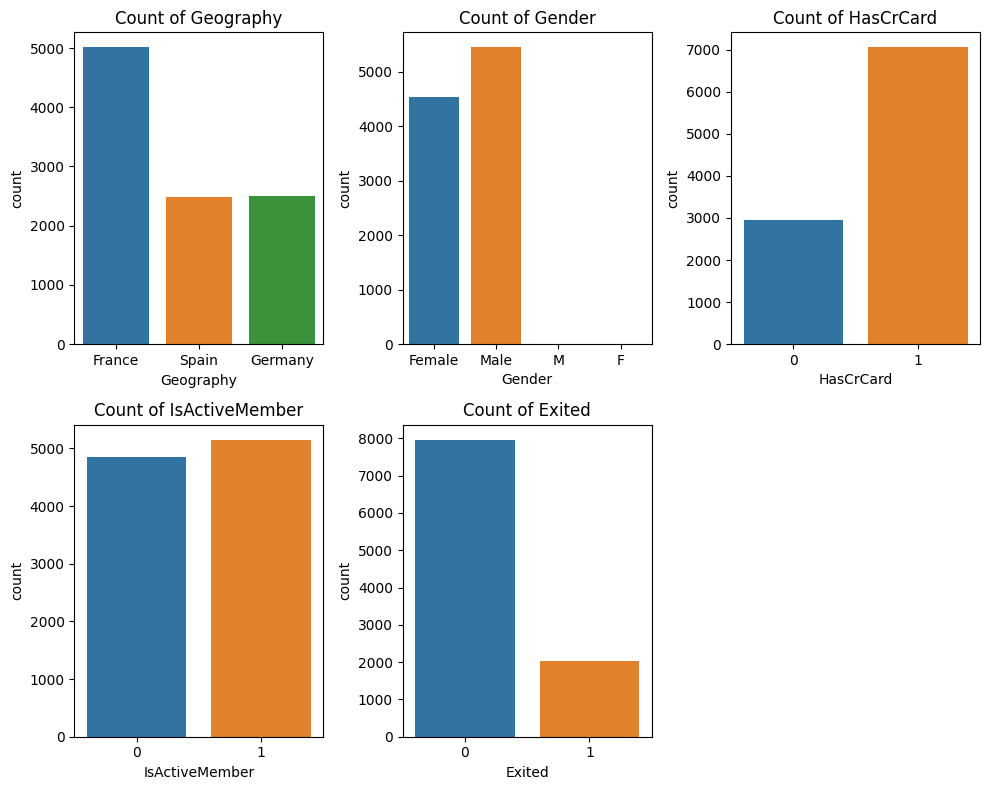

In [ ]:
#Data kategorikal
cat = ['Geography', 'Gender', 'HasCrCard','IsActiveMember', 'Exited']

plt.figure(figsize=(10, 8))
for i, col in enumerate(cat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=dataset[col])
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

In [ ]:
gender_counts = dataset['Gender'].value_counts()
gender_counts

Male      5453
Female    4539
F            3
M            2
Name: Gender, dtype: int64

## 4. Menentukan Objek Data

### Menghapus kolom yang tidak relevan

In [ ]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
dataset.shape

(10000, 11)

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### Mengubah data inkonsisten

In [ ]:
dataset['Gender'] = dataset['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Sekarang data akan terstandarisasi
gender_counts = dataset['Gender'].value_counts()
gender_counts

Male      5455
Female    4542
Name: Gender, dtype: int64

### Mentransformasikan data

In [ ]:
# Kolom-kolom yang perlu ditransformasi
kolom = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Melakukan transformasi string ke int untuk data kategorikal
label_encoder = LabelEncoder()
for col in kolom:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [ ]:
# Calculate the median of the 'Age' column
median_age = dataset['Age'].median()

# Fill NaN values in the 'Age' column with the median value
dataset['Age'].fillna(median_age, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 859.5 KB


In [ ]:
# Calculate the median of the 'Age' column
median_age = dataset['Age'].median()

# Fill NaN values in the 'Age' column with the median value
dataset['Age'].fillna(median_age, inplace=True)

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


### Mencari tingkat korelasi terhadap kolom exited

<function matplotlib.pyplot.show(close=None, block=None)>

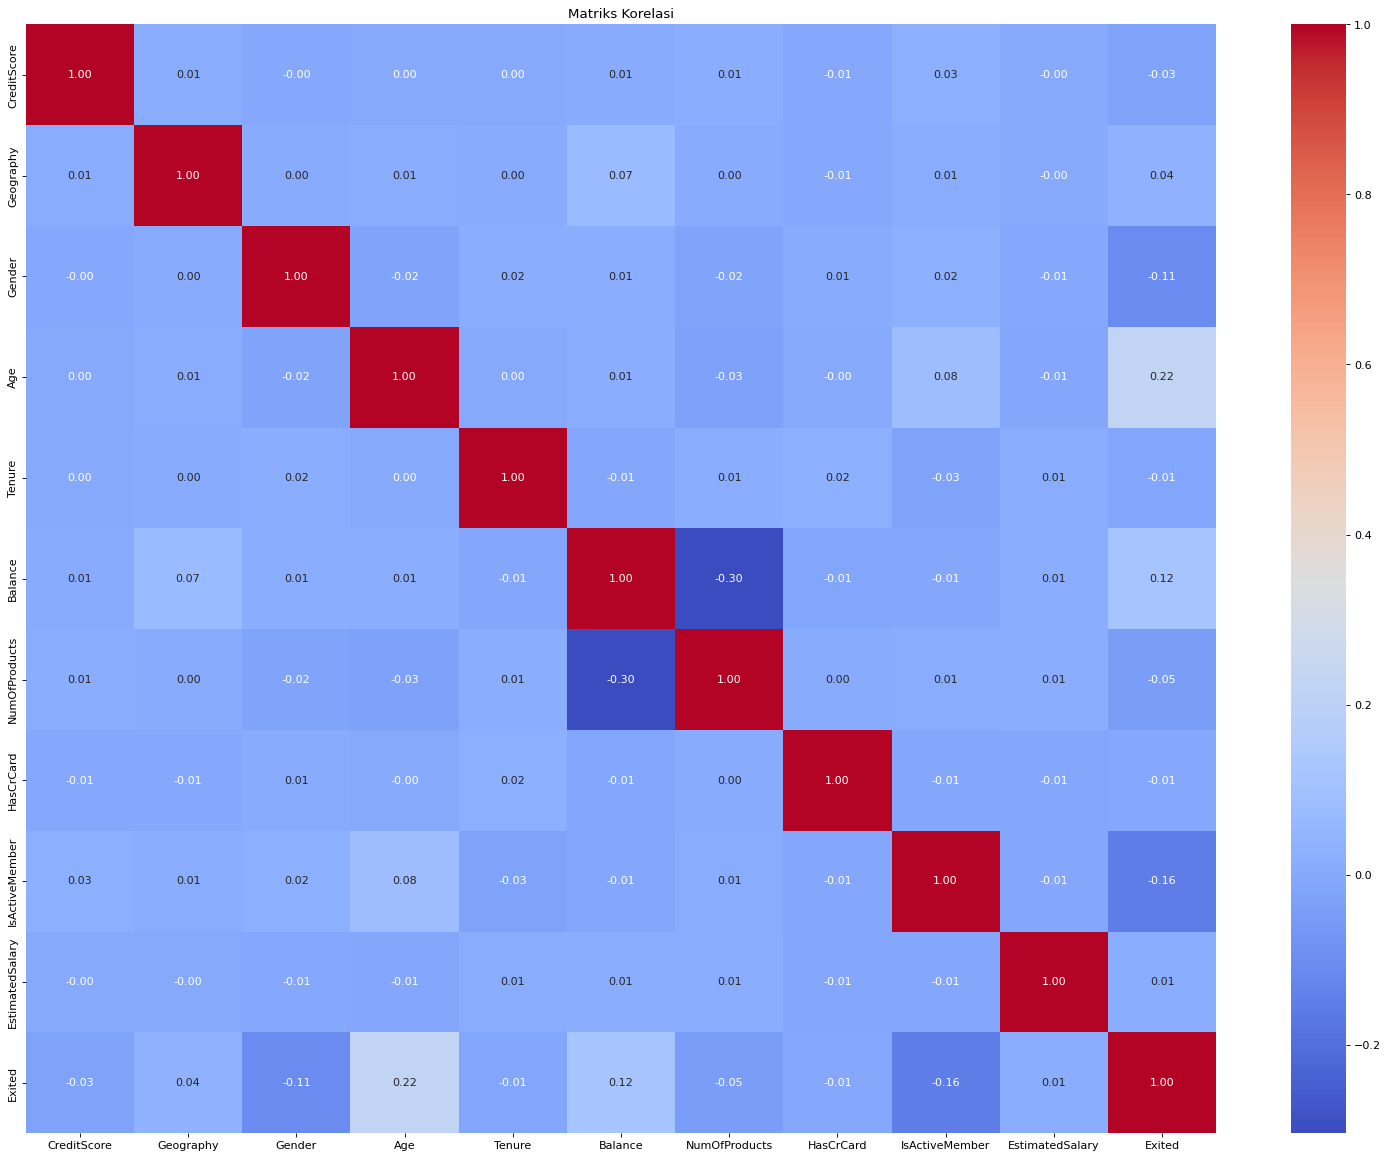

In [ ]:
correlation_matrix = dataset.corr()
# plt.fig.set_size_inches(18.5, 10.5)
plt.figure(figsize=(24, 18), dpi=80)
sns.heatmap(correlation_matrix,annot=True,
	cmap='coolwarm',fmt=".2f")
plt.title('Matriks Korelasi')

plt.savefig('Matriks Korelasi.png')
plt.show

In [ ]:
# Mengurutkan korelasi terhadap kolom target dari tertinggi ke terendah
ranking = correlation_matrix['Exited'].sort_values(ascending=False)

# Menampilkan hasil
print(ranking)

Exited             1.000000
Age                0.222532
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106798
IsActiveMember    -0.156128
Name: Exited, dtype: float64


### Menentukan atribut data

In [ ]:
# Atribut dipilih dengan mengambil kolom dengan nilai korelasi > 0
atribut = ['Exited','Age','Balance','Geography','EstimatedSalary']
dataset = dataset[atribut]

## Memvalidasi Data

### Pengecekkan kelengkapan data

In [ ]:
dataset.isna().sum()

Exited             0
Age                0
Balance            0
Geography          0
EstimatedSalary    0
dtype: int64

In [ ]:
dataset.head()

,Exited,Age,Balance,Geography,EstimatedSalary
0,1,42.0,0.00,0,101348.88
1,0,41.0,83807.86,2,112542.58
2,1,42.0,159660.80,0,113931.57
3,0,39.0,0.00,0,93826.63
4,0,43.0,125510.82,2,79084.10


### Melengkapi data kosong dengan imputasi median menggunakan model regresi

In [ ]:

# Calculate the median of the 'Age' column
median_age = dataset['Age'].median()

# Fill NaN values in the 'Age' column with the median value
dataset['Age'].fillna(median_age, inplace=True)

<ipython-input-29-69f707f500b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'].fillna(median_age, inplace=True)


In [ ]:
dataset.isna().sum()

Exited             0
Age                0
Balance            0
Geography          0
EstimatedSalary    0
dtype: int64

## Membersihkan Data

### Pengecekkan duplikasi data

In [ ]:
# Mengecek nilai duplikat
duplikat = dataset[dataset.duplicated()]
duplikat.sum()

Exited             0.0
Age                0.0
Balance            0.0
Geography          0.0
EstimatedSalary    0.0
dtype: float64

### Pengecekkan outlier

<Axes: >

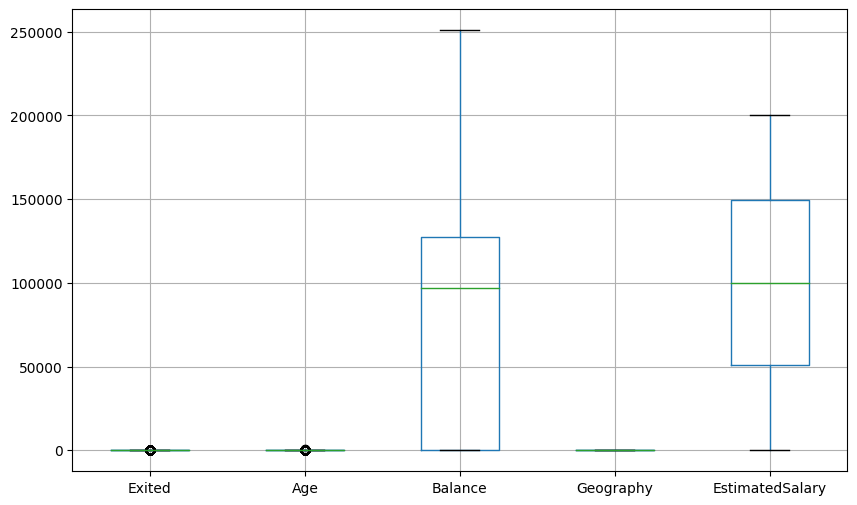

In [ ]:
dataset.boxplot(figsize=(10, 6))

In [ ]:
dataset.head()

,Exited,Age,Balance,Geography,EstimatedSalary
0,1,42.0,0.00,0,101348.88
1,0,41.0,83807.86,2,112542.58
2,1,42.0,159660.80,0,113931.57
3,0,39.0,0.00,0,93826.63
4,0,43.0,125510.82,2,79084.10


### Menghapus outlier

In [ ]:
# # Menghitung IQR
# pencilan = ['Exited','Age']
x = 0
for i in range (x <= 4 ):
  x +=1
  Q1 = dataset['Age'].quantile(0.25)
  Q3 = dataset['Age'].quantile(0.75)
  IQR = Q3 - Q1

  # Menentukan batas untuk data pencilan
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Mengidentifikasi data pencilan
  outliers = dataset[(dataset['Age'] < lower_bound) | (dataset['Age'] > upper_bound)]
  print(outliers.sum())

  # Menghapus data pencilan
  dataset = dataset[(dataset['Age'] >= lower_bound) & (dataset['Age'] <= upper_bound)]

  dataset.head()

Exited                   74.00
Age                   26573.00
Balance            26917396.98
Geography               270.00
EstimatedSalary    35375305.61
dtype: float64


<Axes: >

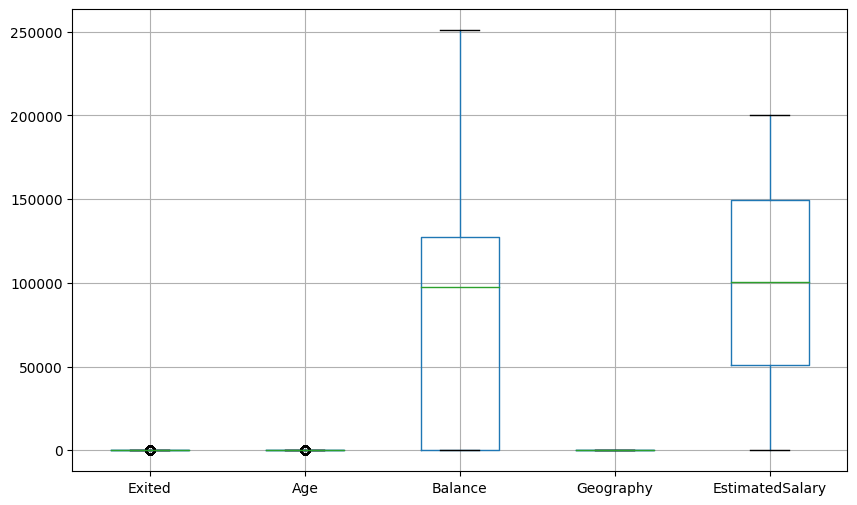

In [ ]:
dataset.boxplot(figsize=(10, 6))

<function matplotlib.pyplot.show(close=None, block=None)>

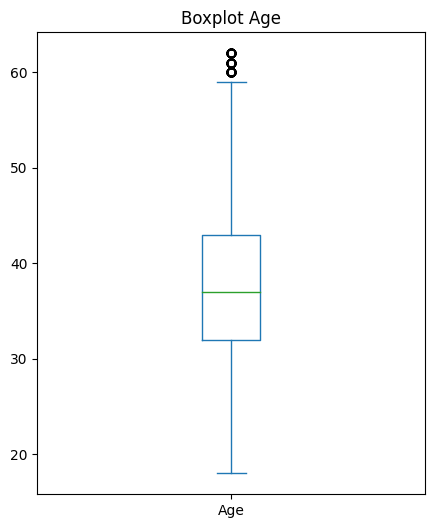

In [ ]:
dataset['Age'].plot(kind='box',figsize=(5,6))
plt.title('Boxplot Age')
plt.show

In [ ]:
dataset.isna().sum()

Exited             0
Age                0
Balance            0
Geography          0
EstimatedSalary    0
dtype: int64

In [ ]:
dataset.head()

,Exited,Age,Balance,Geography,EstimatedSalary
0,1,42.0,0.00,0,101348.88
1,0,41.0,83807.86,2,112542.58
2,1,42.0,159660.80,0,113931.57
3,0,39.0,0.00,0,93826.63
4,0,43.0,125510.82,2,79084.10


## Pelabelan

In [ ]:
# Membagi variabel menjadi variabel dependent dan independent
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 9638 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
9638 non-null   int64
dtypes: int64(1)
memory usage: 150.6 KB


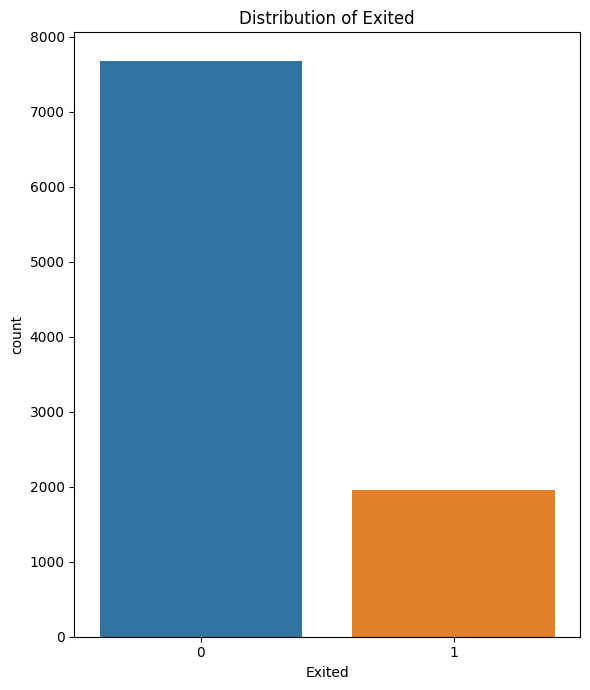

In [ ]:
plt.figure(figsize=(6, 7))
sns.countplot(x='Exited', data=dataset)
plt.title(f'Distribution of Exited')

plt.tight_layout()
plt.show()

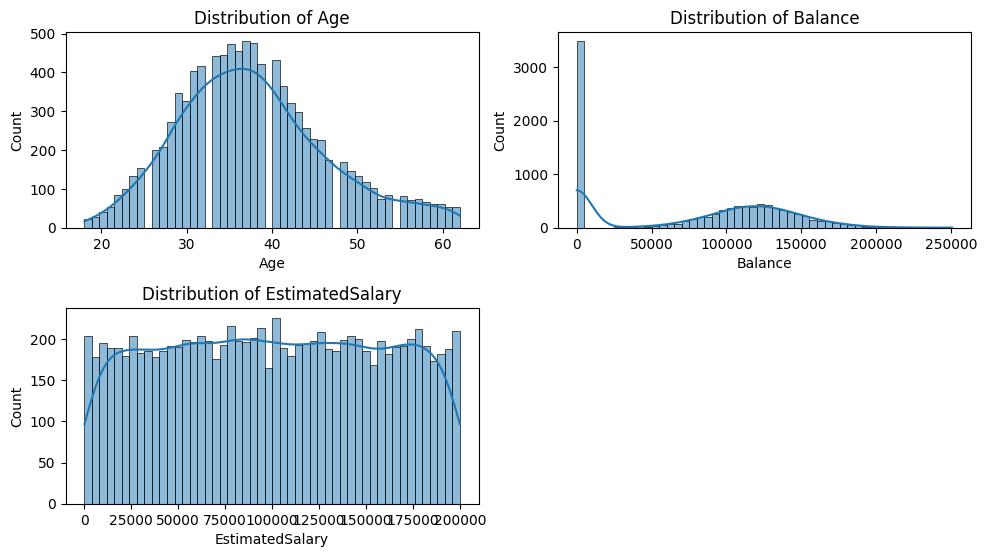

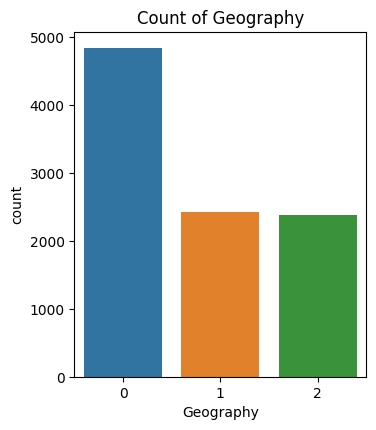

In [ ]:
# Data numerik
num = ['Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(10, 8))
for i, col in enumerate(num, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#Data kategorikal
cat = ['Geography']

plt.figure(figsize=(10, 8))
for i, col in enumerate(cat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=dataset[col])
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()

In [ ]:
y.describe()

count    9638.000000
mean        0.203673
std         0.402749
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Exited, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
X_test.head()

,Age,Balance,Geography,EstimatedSalary
8133,34.0,118307.57,0,136120.29
688,51.0,136294.97,0,38867.46
9332,62.0,148214.36,1,48571.14
6362,34.0,0.00,2,180595.02
9158,31.0,118158.74,2,158027.57


In [ ]:
y_test.head()

8133    0
688     1
9332    1
6362    0
9158    0
Name: Exited, dtype: int64

## Pemodelan

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [ ]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

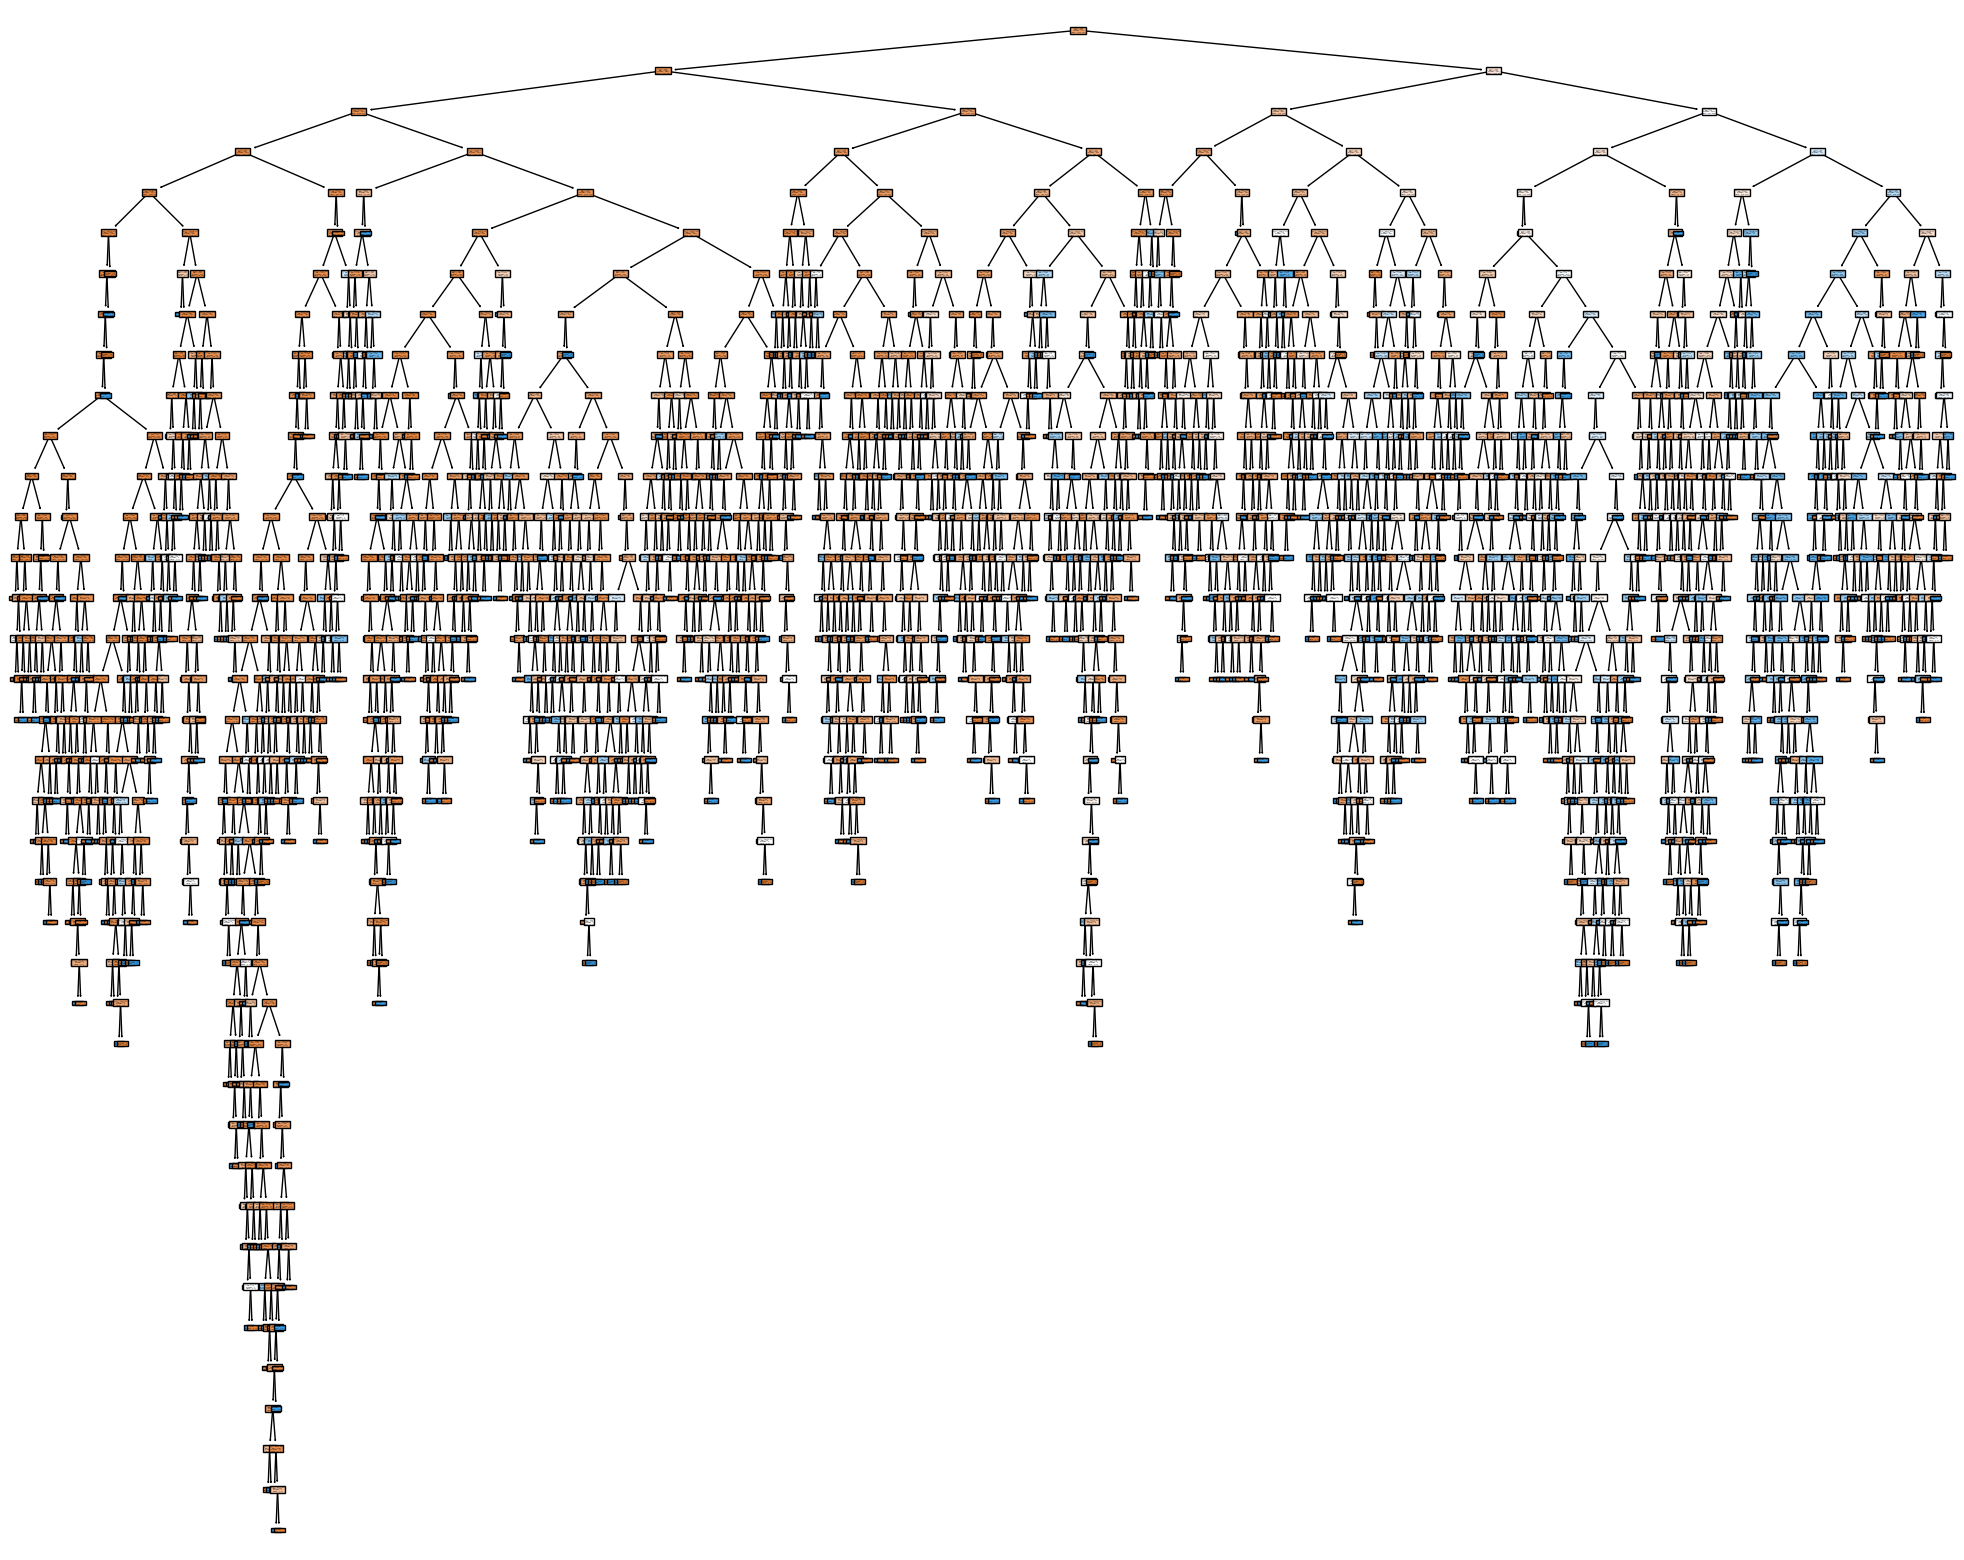

In [ ]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(dt_model,filled=True)

### Feature Importance

['Age', 0.43059358]
['Balance', 0.1806696]
['Geography', 0.2366388]
['EstimatedSalary', 0.15209806]


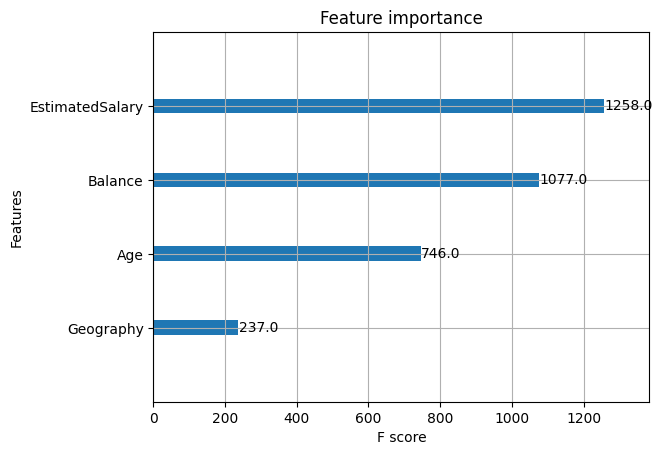

In [ ]:
from xgboost import plot_importance

# Menentukan feature importance
feature_importance = xgb_model.feature_importances_

# Menampilkan feature importance untuk setiap fitur
for feature, importance in zip(X_train.columns, feature_importance):
    print([feature, importance])

# Visualisasi feature importance
plot_importance(xgb_model, max_num_features=5)
plt.show()

## Evaluasi Model

In [ ]:
# Evaluasi performa
print("Akurasi:\n", accuracy_score(y_test, dt_predictions),"\n",(accuracy_score(y_test, dt_predictions)*100),"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

Akurasi:
 0.7396265560165975 
 73.96265560165975 %
Confusion Matrix:
 [[1276  241]
 [ 261  150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1517
           1       0.38      0.36      0.37       411

    accuracy                           0.74      1928
   macro avg       0.61      0.60      0.60      1928
weighted avg       0.73      0.74      0.74      1928



In [ ]:
# Evaluasi performa
print("Akurasi:\n", accuracy_score(y_test, xgb_predictions),"\n",(accuracy_score(y_test, xgb_predictions)*100),"%")
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

Akurasi:
 0.7992738589211619 
 79.92738589211619 %
Confusion Matrix:
 [[1415  102]
 [ 285  126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1517
           1       0.55      0.31      0.39       411

    accuracy                           0.80      1928
   macro avg       0.69      0.62      0.64      1928
weighted avg       0.77      0.80      0.78      1928



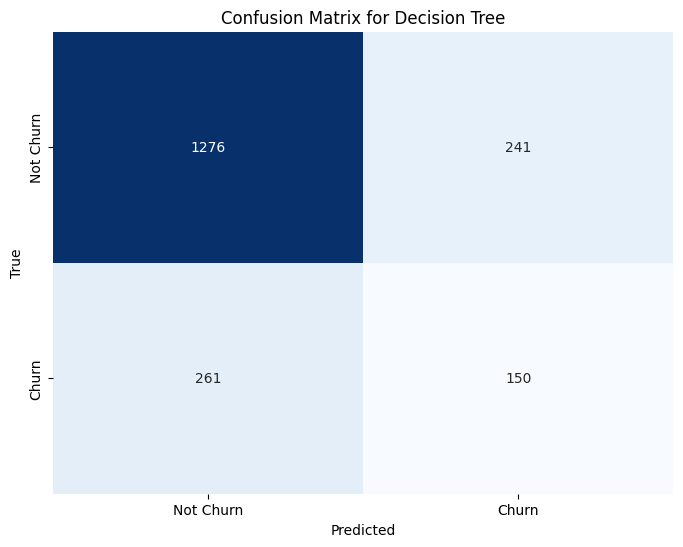

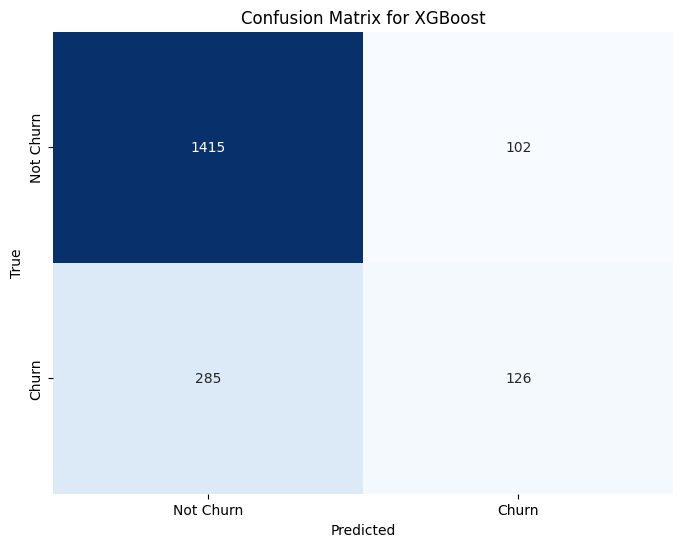

In [ ]:
# Confusion Matrix dan Metrik Evaluasi
models = [('Decision Tree', dt_predictions), ('XGBoost', xgb_predictions)]

for model_name, predictions in models:
    cm = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Visualisasi Confusion Matrix menggunakan Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Churn', 'Churn'],
                yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()